# Bank Marketing Analytics of Client Subscription

# Table of Contents

1. **[Project Background](#1)**
2. **[Load the data and Examine the data.](#2)**
3. **[Data Cleaning](#3)**
4. **[Exploratory Data Analysis](#4)**
5. **[Data Visualization](#5)**
6. **[Machine Learning: Classification](#6)**
7. **[Machine Learning: Regression](#7)**
8. **[Conclusion & Recommendations](#8)**

### 1. Project Background

This Jupyter Notebook loads, explores, and visualizes the Bank Marketing datasets. Also, builds and tests several predictive models, and then predict if client will subscribe a term deposit on test data using the best model.

In [1]:
# Current workspace
!pwd

/Users/suroor/Desktop/Springboard/Bank-Marketing-Client-Subscription-/Bank-Marketing-Client-Subscription-


In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.utils import shuffle

% matplotlib inline

###  2. Load the data and Examine the data

In [3]:
#Load csv file to pd dataframe
bank_data = pd.read_csv("bank-additional-full.csv",sep=';')

#### <font color=green>*Examine the data*</font>

In [4]:
# Columns information
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
# print first five rows of bank_data
bank_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# display total number of rows and columns
bank_data.shape

(41188, 21)

In [7]:
# know bak_data information 
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [8]:
# Describe numeric bank_data
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# check the occurrence of each job in bank_data
bank_data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

### 3. Data Cleaning

#### *Check for Duplicates*

In [10]:
bank_data.duplicated().sum()

12

#### <font color=green>*Check invalid or corrupt data and remove it*</font>

In [11]:
'''remove duplicated rows'''
def clean_data(data):
    clean_data = data.drop_duplicates()
    return clean_data

In [12]:
'''Shuffle improves cross-validation accuracy'''
#clean_bank_data = shuffle(clean_data(bank_data))
#clean_bank_data.head(5)

'Shuffle improves cross-validation accuracy'

In [13]:
clean_bank_data = clean_data(bank_data)
clean_bank_data.shape

(41176, 21)

In [14]:
clean_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### 4. Exploratory Data Analysis

In [15]:
'''Divide varibles in categorical and numerical'''
categorical_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
numeric_vars = ['age', 'duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
target_var = ['y']

In [94]:
# seperate feature and traget variables
clean_bank_data_X = clean_bank_data.iloc[:,:-1]
clean_bank_data_y = clean_bank_data.iloc[:,-1]
clean_bank_data_y

0         no
1         no
2         no
3         no
4         no
5         no
6         no
7         no
8         no
9         no
10        no
11        no
12        no
13        no
14        no
15        no
16        no
17        no
18        no
19        no
20        no
21        no
22        no
23        no
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
41158    yes
41159    yes
41160    yes
41161     no
41162     no
41163    yes
41164    yes
41165    yes
41166    yes
41167     no
41168     no
41169     no
41170     no
41171    yes
41172    yes
41173    yes
41174    yes
41175     no
41176     no
41177     no
41178    yes
41179     no
41180     no
41181    yes
41182     no
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41176, dtype: object

In [17]:
# know target variable data
clean_bank_data_y.value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [18]:
clean_bank_data_X['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

#### *Summarize numeric variable*

In [19]:
clean_bank_data_X.describe(include=[np.number])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### *summarize categorical variable*

In [20]:
clean_bank_data.describe(include = ['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


#### *Find Correction of variables*

In [21]:
def get_correlation(data):
    return data.corr()

corr_data = get_correlation(clean_bank_data_X)
corr_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


### 5. Data Visualization

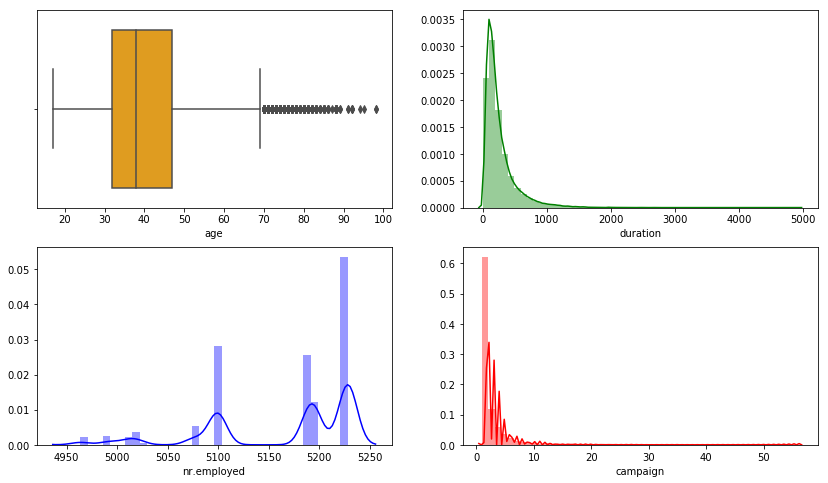

In [22]:
plt.figure(figsize = (14, 8))
plt.subplot(2,2,1)
sns.boxplot(clean_bank_data_X.age, color='Orange')
plt.subplot(2,2,2)
sns.distplot(clean_bank_data_X.duration, color='green')
plt.subplot(2,2,3)
sns.distplot(clean_bank_data_X['nr.employed'], color='blue')
plt.subplot(2,2,4)
sns.distplot(clean_bank_data_X.campaign, color='red')
plt.show()

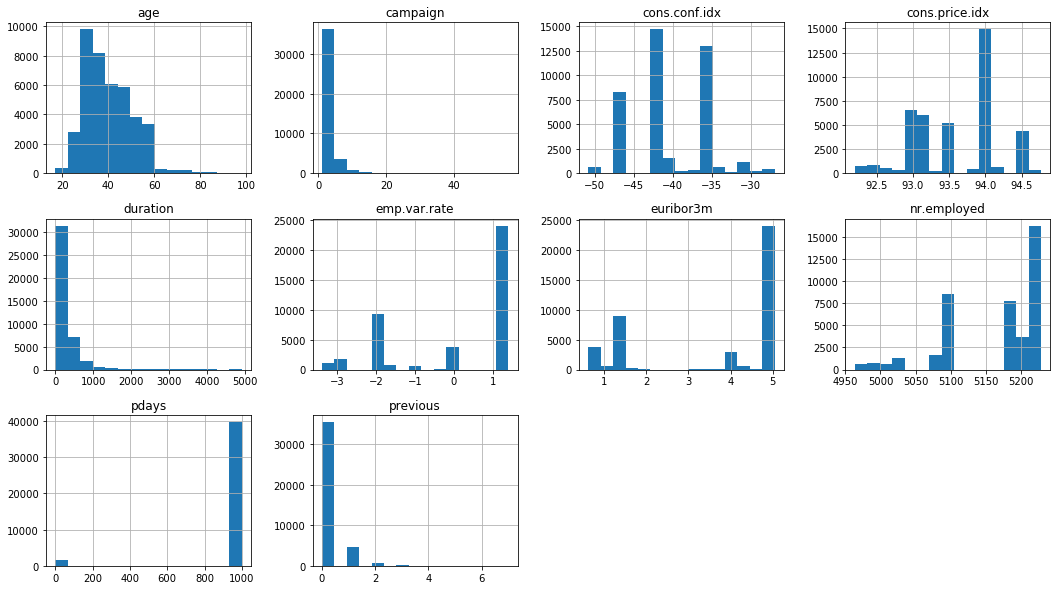

In [23]:
clean_bank_data_X[numeric_vars].hist(bins=15, figsize=(18, 10), layout=(3, 4))
plt.show()

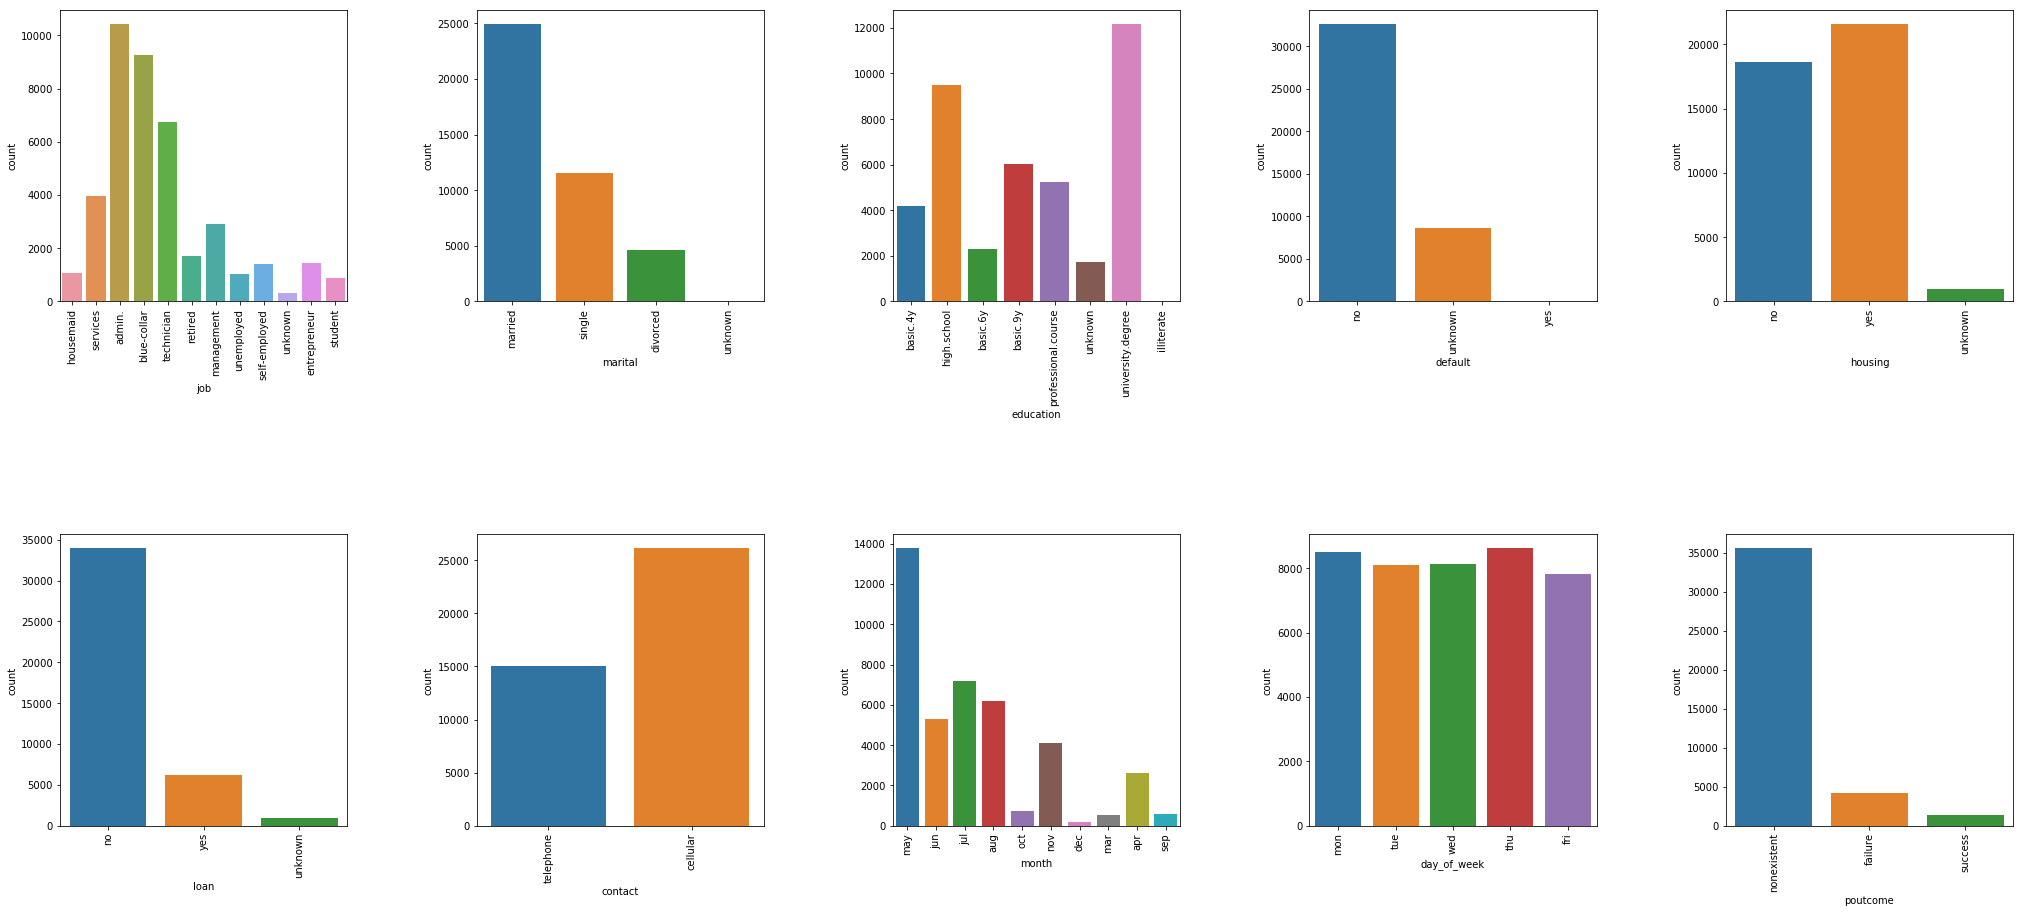

In [24]:
# Visualize all categorical variables
fig, ax = plt.subplots(2, 5, figsize=(35, 15))
for variable, subplot in zip(categorical_vars, ax.flatten()):
    sns.countplot(clean_bank_data_X[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.subplots_adjust(wspace=0.45, hspace=0.8)


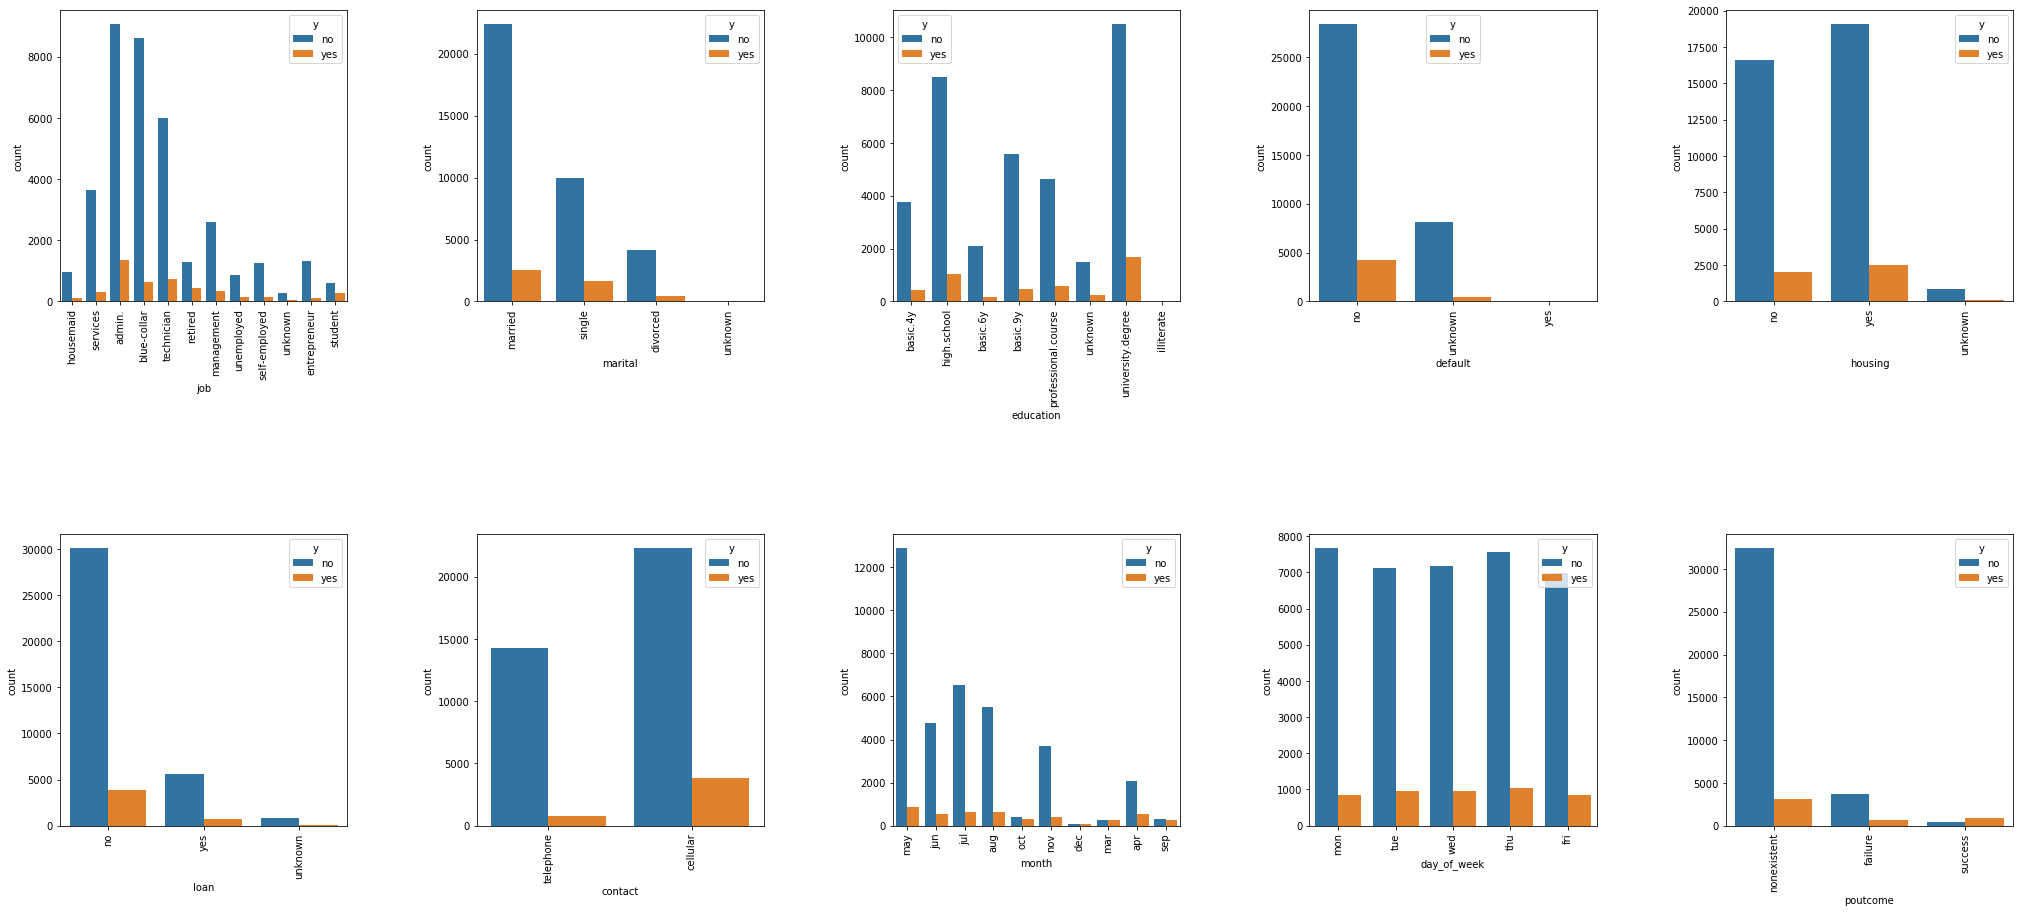

In [25]:
fig, ax = plt.subplots(2, 5, figsize=(35, 15))
for variable, subplot in zip(categorical_vars, ax.flatten()):
    sns.countplot(x=variable,hue='y',data=clean_bank_data,ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.subplots_adjust(wspace=0.45, hspace=0.8)

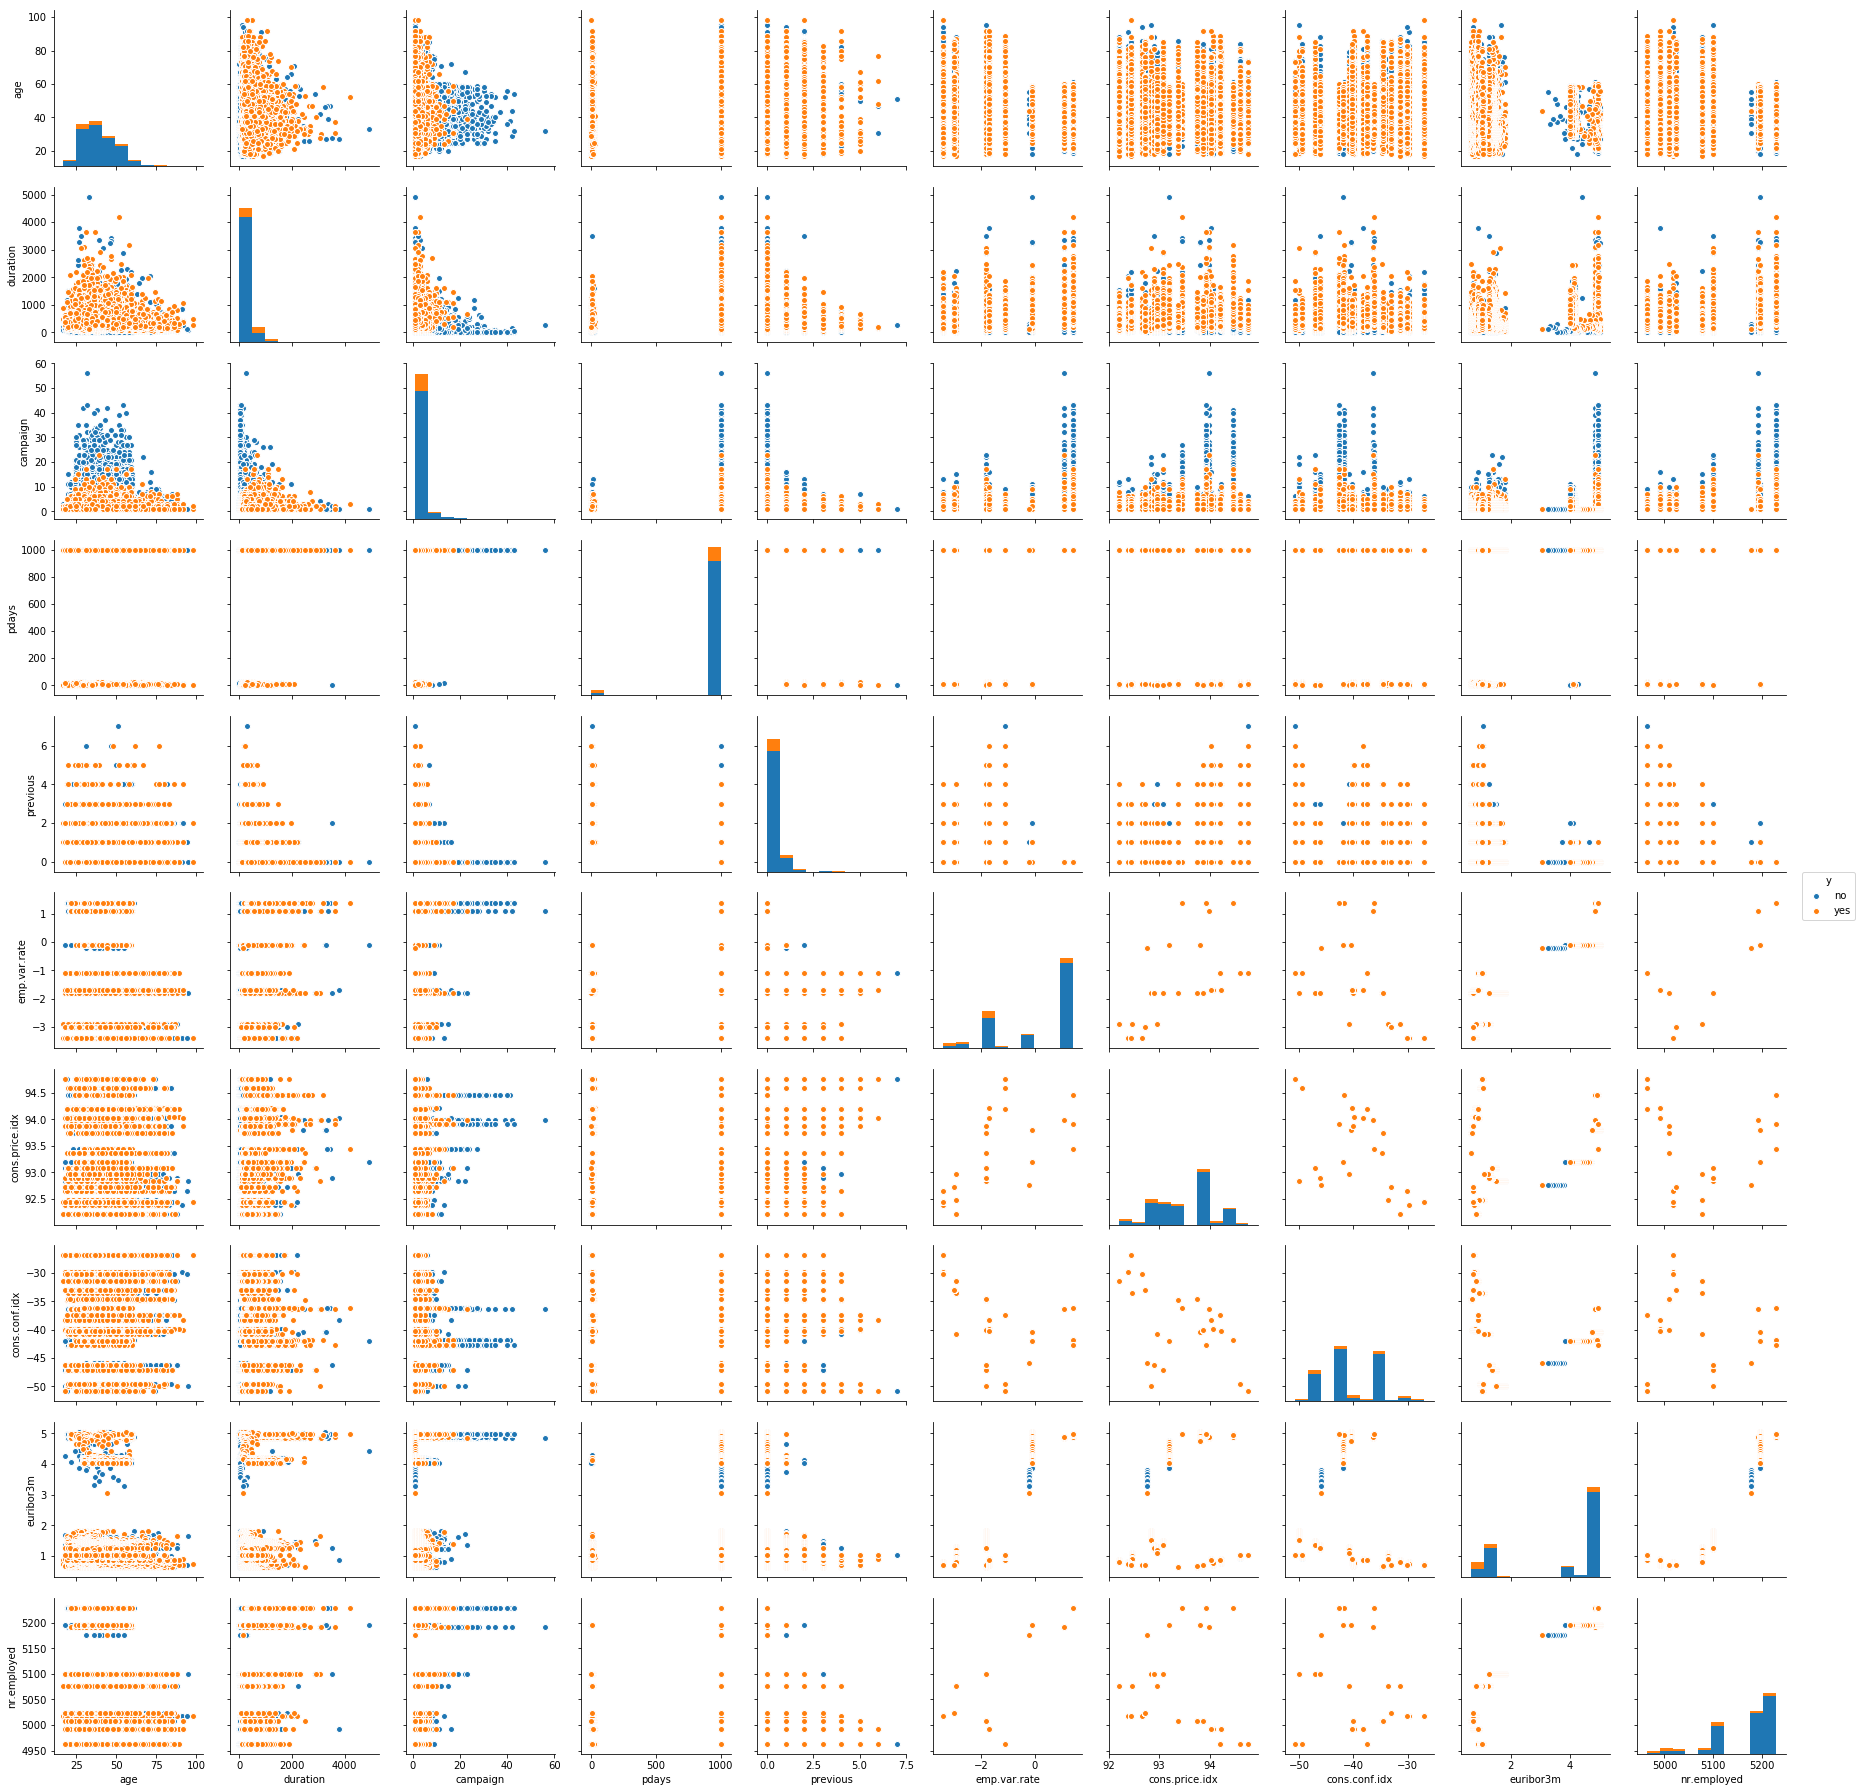

In [26]:
# Visualize all numeric variables
sns.pairplot(clean_bank_data, hue='y')

### 6. Machine Learning: Classification

In [70]:
# import LabelEncoder and instantiate object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [71]:
# apply LabelEncoder object on categorical columns
clean_bank_data_X[categorical_vars] = clean_bank_data_X[categorical_vars].apply(lambda col : le.fit_transform(col))
clean_bank_data_X[categorical_vars].head(10)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1
5,7,1,2,1,0,0,1,6,1,1
6,0,1,5,0,0,0,1,6,1,1
7,1,1,7,1,0,0,1,6,1,1
8,9,2,5,0,2,0,1,6,1,1
9,7,2,3,0,2,0,1,6,1,1


In [72]:
# import OneHotEncoder and instantiate object
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=clean_bank_data_X[categorical_vars], sparse=False)
df_ohe = ohe.fit_transform(clean_bank_data_X)
df_ohe

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -3.64000000e+01,   4.85700000e+00,   5.19100000e+03],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -3.64000000e+01,   4.85700000e+00,   5.19100000e+03],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -3.64000000e+01,   4.85700000e+00,   5.19100000e+03],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -5.08000000e+01,   1.02800000e+00,   4.96360000e+03],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -5.08000000e+01,   1.02800000e+00,   4.96360000e+03],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -5.08000000e+01,   1.02800000e+00,   4.96360000e+03]])

In [73]:
X = pd.get_dummies(clean_bank_data_X, columns=categorical_vars)
X.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [74]:
# chech shape of new data
X.shape

(41176, 63)

In [75]:
# check new columns
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_0',
       'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8',
       'job_9', 'job_10', 'job_11', 'marital_0', 'marital_1', 'marital_2',
       'marital_3', 'education_0', 'education_1', 'education_2', 'education_3',
       'education_4', 'education_5', 'education_6', 'education_7', 'default_0',
       'default_1', 'default_2', 'housing_0', 'housing_1', 'housing_2',
       'loan_0', 'loan_1', 'loan_2', 'contact_0', 'contact_1', 'month_0',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'day_of_week_0', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'poutcome_0',
       'poutcome_1', 'poutcome_2'],
      dtype='object')

In [125]:
# check info of new data
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 63 columns):
age               41176 non-null int64
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
job_0             41176 non-null uint8
job_1             41176 non-null uint8
job_2             41176 non-null uint8
job_3             41176 non-null uint8
job_4             41176 non-null uint8
job_5             41176 non-null uint8
job_6             41176 non-null uint8
job_7             41176 non-null uint8
job_8             41176 non-null uint8
job_9             41176 non-null uint8
job_10            41176 non-null uint8
job_11            41176 non-null uint8
marital_0         41176

In [126]:
# store target as y variable
#y = le.fit_transform(clean_bank_data_y.astype('str'))
#y
y = pd.factorize(clean_bank_data_y)[0]

# View target
y

array([0, 0, 0, ..., 0, 1, 0])

In [127]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [128]:
print('Training Features Shape:', X_train.shape)
print('Training test Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing test Shape:', y_test.shape)

Training Features Shape: (28823, 63)
Training test Shape: (12353, 63)
Testing Features Shape: (28823,)
Testing test Shape: (12353,)


In [129]:
#Scaling data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [130]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train_std, y_train);

In [131]:
# Use the forest's predict method on the test data
y_predict = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_predict - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#Print performance
print('The accuracy of the Random Forest classifier on training data is {:.2f}'.format(rf.score(X_train_std, y_train)))
print('The accuracy of the Random Forest classifier on test data is {:.2f}'.format(rf.score(X_test_std, y_test)))

Mean Absolute Error: 0.53 degrees.
The accuracy of the Random Forest classifier on training data is 0.92
The accuracy of the Random Forest classifier on test data is 0.41


In [133]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [52]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: duration             Importance: 0.34
Variable: nr.employed          Importance: 0.15
Variable: age                  Importance: 0.08
Variable: euribor3m            Importance: 0.08
Variable: campaign             Importance: 0.03
Variable: pdays                Importance: 0.02
Variable: cons.conf.idx        Importance: 0.02
Variable: previous             Importance: 0.01
Variable: cons.price.idx       Importance: 0.01
Variable: job_0                Importance: 0.01
Variable: job_1                Importance: 0.01
Variable: job_4                Importance: 0.01
Variable: job_7                Importance: 0.01
Variable: job_9                Importance: 0.01
Variable: marital_0            Importance: 0.01
Variable: marital_1            Importance: 0.01
Variable: marital_2            Importance: 0.01
Variable: education_0          Importance: 0.01
Variable: education_2          Importance: 0.01
Variable: education_3          Importance: 0.01
Variable: education_5          Importanc

### 7. Machine Learning: Regression

### 8. Conclusion & Recommendations